In [11]:
# Movie Classifier
from keras.datasets import imdb
from keras import models, layers, optimizers, metrics, losses
import matplotlib.pyplot as plt


In [12]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [13]:
# 3.2 Prepare the data
import numpy as np

def vectorise_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions)) # All-zero matrix
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1                     # sets specific indices to 1s
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=4, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 34ms/step - loss: 0.4955 - binary_accuracy: 0.7946 - val_loss: 0.4227 - val_binary_accuracy: 0.8171
Epoch 2/4
30/30 [==============================] - 0s 16ms/step - loss: 0.2957 - binary_accuracy: 0.9036 - val_loss: 0.2977 - val_binary_accuracy: 0.8891
Epoch 3/4
30/30 [==============================] - 1s 17ms/step - loss: 0.2171 - binary_accuracy: 0.9297 - val_loss: 0.2980 - val_binary_accuracy: 0.8806
Epoch 4/4
30/30 [==============================] - 0s 16ms/step - loss: 0.1727 - binary_accuracy: 0.9435 - val_loss: 0.3122 - val_binary_accuracy: 0.8753


In [17]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3273 - binary_accuracy: 0.8670


In [4]:
import pandas as pd
pd.DataFrame(history.history).plot()


NameError: name 'history' is not defined

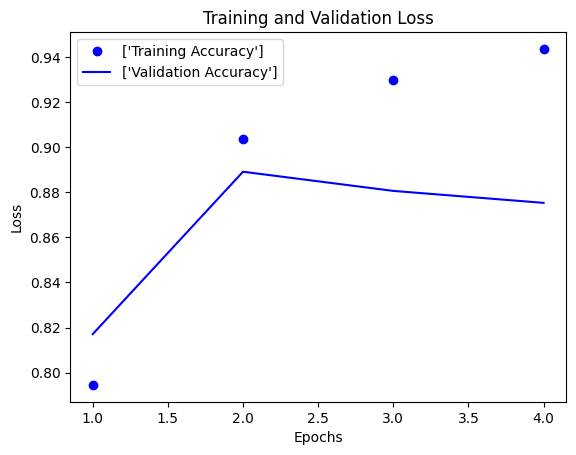

In [23]:
# Plotting train vs validation
history_dict = history.history
# history_dict.keys()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label=['Training Accuracy'])
plt.plot(epochs, val_acc_values, 'b', label=['Validation Accuracy'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Prediction 3.4.5
model.predict(x_test) 

782/782 [==============================] - 1s 1ms/step


array([[0.3530962 ],
       [0.99896324],
       [0.9790484 ],
       ...,
       [0.21926187],
       [0.28134805],
       [0.72226655]], dtype=float32)